# Análisis exploratorio inicial

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Cargar datos ===
file_path = "datos/clinical_and_imaging_info.xlsx"
df = pd.read_excel(file_path, sheet_name="dataset_info")

In [76]:
# === 2. Información general ===
print("Dimensiones del DataFrame:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}\n")

print("Tipos de datos:")
print(df.dtypes.value_counts(), "\n")

print("Primeras filas:")
print(df.head(), "\n")

Dimensiones del DataFrame:
Filas: 1506, Columnas: 50

Tipos de datos:
float64    24
object     17
int64       9
Name: count, dtype: int64 

Primeras filas:
  patient_id dataset  bilateral_breast_cancer  multifocal_cancer nac_agent  \
0   DUKE_001    DUKE                        0                0.0       NaN   
1   DUKE_002    DUKE                        0                0.0       NaN   
2   DUKE_005    DUKE                        0                1.0       NaN   
3   DUKE_009    DUKE                        0                1.0       NaN   
4   DUKE_010    DUKE                        0                1.0       NaN   

   endocrine_therapy  anti_her2_neu_therapy  pcr  mastectomy_post_nac  \
0                0.0                    1.0  0.0                  0.0   
1                0.0                    0.0  0.0                  0.0   
2                0.0                    1.0  1.0                  1.0   
3                0.0                    0.0  1.0                  0.0   
4         

In [77]:
# Ver número total de pacientes únicos
num_pacientes = df['patient_id'].nunique()
print(f"Total de pacientes: {num_pacientes}")

# Ver distribución por dataset (DUKE, ISPY1, etc.)
pacientes_por_dataset = df['dataset'].value_counts()
print("\nDistribución por dataset:")
print(pacientes_por_dataset)

Total de pacientes: 1506

Distribución por dataset:
dataset
ISPY2    980
DUKE     291
ISPY1    171
NACT      64
Name: count, dtype: int64


In [78]:
# === 3. Valores nulos ===
print("Porcentaje de nulos por columna:")
null_percent = df.isnull().mean().sort_values(ascending=False) * 100
print(null_percent[null_percent > 0], "\n")

Porcentaje de nulos por columna:
oncotype_score           98.539177
breast_density           96.015936
days_to_metastasis       95.750332
patient_size             93.027888
nottingham_grade         87.250996
endocrine_therapy        80.743692
anti_her2_neu_therapy    80.743692
mastectomy_post_nac      76.826029
days_to_death            69.521912
pr                       66.135458
er                       66.135458
days_to_follow_up        65.670651
days_to_recurrence       65.272244
mammaprint               34.926959
nac_agent                30.677291
menopause                27.091633
acquisition_date         19.322709
weight                   16.533865
bmi_group                16.533865
multifocal_cancer        10.624170
acquisition_times         2.191235
window_center             2.191235
window_width              2.191235
tumor_subtype             1.726428
her2                      1.460823
hr                        1.062417
ethnicity                 1.062417
pcr                   

In [79]:
# === 4. Separar por tipo de variable ===
cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


print("Variables categóricas:", cat_cols, "\n")
print("Variables numéricas:", num_cols, "\n")

Variables categóricas: ['patient_id', 'dataset', 'nac_agent', 'nottingham_grade', 'tumor_subtype', 'menopause', 'ethnicity', 'bmi_group', 'breast_density', 'view', 'pixel_spacing', 'site', 'manufacturer', 'scanner_model', 'acquisition_times', 'acquisition_date', 'tcia_series_uid'] 

Variables numéricas: ['bilateral_breast_cancer', 'multifocal_cancer', 'endocrine_therapy', 'anti_her2_neu_therapy', 'pcr', 'mastectomy_post_nac', 'days_to_follow_up', 'days_to_recurrence', 'days_to_metastasis', 'days_to_death', 'hr', 'er', 'pr', 'her2', 'mammaprint', 'oncotype_score', 'age', 'has_implant', 'weight', 'patient_size', 'bilateral_mri', 'num_phases', 'fat_suppressed', 'field_strength', 'image_rows', 'image_columns', 'num_slices', 'slice_thickness', 'high_bit', 'window_center', 'window_width', 'echo_time', 'repetition_time'] 



In [80]:
# === 5. Estadísticas descriptivas ===
print("Estadísticas de variables numéricas:")
print(df[num_cols].describe().T, "\n")

Estadísticas de variables numéricas:
                          count         mean         std         min  \
bilateral_breast_cancer  1506.0     0.019920    0.139773    0.000000   
multifocal_cancer        1346.0     0.400446    0.490171    0.000000   
endocrine_therapy         290.0     0.010345    0.101357    0.000000   
anti_her2_neu_therapy     290.0     0.279310    0.449436    0.000000   
pcr                      1491.0     0.295104    0.456243    0.000000   
mastectomy_post_nac       349.0     0.541547    0.498986    0.000000   
days_to_follow_up         517.0  1425.595745  682.813628   76.000000   
days_to_recurrence        523.0   181.629063  419.699313    0.000000   
days_to_metastasis         64.0   284.062500  575.646245    0.000000   
days_to_death             459.0   104.849673  300.006087    0.000000   
hr                       1490.0     0.561074    0.496423    0.000000   
er                        510.0     0.560784    0.496779    0.000000   
pr                        5

In [81]:
# === 6. Distribución de variables categóricas ===
print("Distribuciones de variables categóricas:")
for col in cat_cols:
    print(f"\n▶️ {col}:\n{df[col].value_counts(dropna=False)}")

Distribuciones de variables categóricas:

▶️ patient_id:
patient_id
NACT_68     1
DUKE_001    1
NACT_52     1
NACT_51     1
NACT_50     1
           ..
DUKE_019    1
DUKE_012    1
DUKE_010    1
DUKE_009    1
DUKE_005    1
Name: count, Length: 1506, dtype: int64

▶️ dataset:
dataset
ISPY2    980
DUKE     291
ISPY1    171
NACT      64
Name: count, dtype: int64

▶️ nac_agent:
nac_agent
NaN                                      462
Paclitaxel                               178
Paclitaxel + AMG 386                     115
Paclitaxel + Neratinib                   112
Paclitaxel + Ganitumab                   106
Paclitaxel + Ganetespib                   93
Paclitaxel + ABT 888 + Carboplatin        70
Paclitaxel + Pembrolizumab                69
Paclitaxel + MK-2206                      59
T-DM1 + Pertuzumab                        52
Anthracycline                             45
Paclitaxel + Pertuzumab + Trastuzumab     44
Paclitaxel + MK-2206 + Trastuzumab        32
Paclitaxel + Trastuzumab     

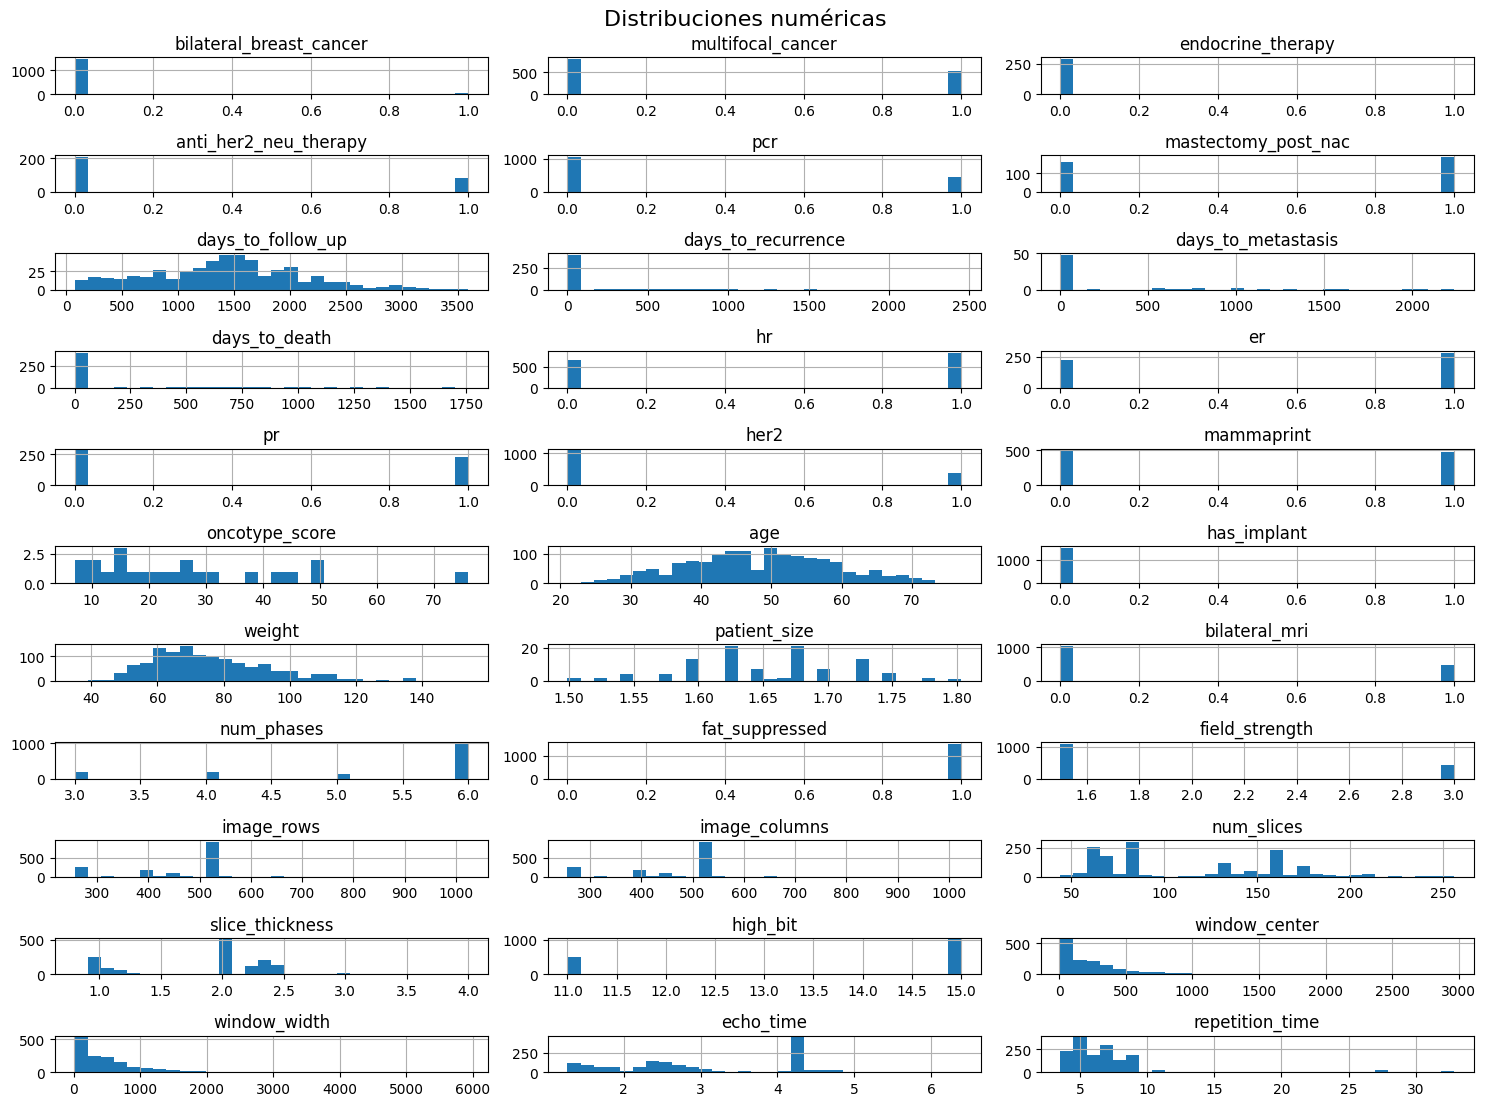

In [82]:
# === 7. Histogramas para numéricas ===
df[num_cols].hist(bins=30, figsize=(15, 12), layout=(len(num_cols) // 3 + 1, 3))
plt.suptitle("Distribuciones numéricas", fontsize=16)
plt.tight_layout()
plt.show()


### 📊 Análisis de Distribuciones Numéricas

El histograma general de las variables numéricas del dataset MAMA-MIA revela varios aspectos clave para el análisis posterior:

- **Variables binarias (0 o 1):** Muchas variables como `pcr`, `anti_her2_neu_therapy`, `hr`, `er`, `pr`, `mastectomy_post_nac` o `has_implant` son binarias y presentan una **distribución altamente desbalanceada**. Por ejemplo, la mayoría de los pacientes no tienen implantes y no lograron una respuesta patológica completa (`pcr = 0`). Este desequilibrio debe tenerse en cuenta en el modelado, utilizando métricas apropiadas (como F1-score o AUC) y, si fuera necesario, técnicas de balanceo como SMOTE.

- **Variables clínicas continuas:** Variables como `age`, `weight`, y `patient_size` muestran distribuciones esperadas en población adulta. `age` tiene forma aproximadamente normal, con mayor frecuencia en mujeres de entre 45 y 55 años. `weight` también tiene un patrón simétrico, sin valores atípicos evidentes.

- **Variables de seguimiento:** Los histogramas de `days_to_follow_up`, `days_to_recurrence`, `days_to_death` y `days_to_metastasis` están muy sesgados hacia la izquierda, lo que indica que muchos pacientes no han experimentado estos eventos durante el tiempo de seguimiento. En algunos casos, el número de ceros es muy alto, lo que sugiere considerar estas variables como categóricas o binarizadas ("evento sí/no").

- **Variables técnicas de imagen:** Existen claras diferencias en los parámetros de adquisición. Por ejemplo:
  - `field_strength` muestra dos picos principales correspondientes a **1.5T** y **3T**, lo que evidencia heterogeneidad entre escáneres.
  - `num_phases` varía entre 3 y 6, lo que puede reflejar diferentes protocolos DCE-MRI entre centros.
  - `image_rows`, `image_columns`, `slice_thickness` y otros parámetros muestran amplia variabilidad técnica.

Esta variabilidad es crítica para evaluar la **robustez y generalización** de los modelos basados en imagen. Los algoritmos de deep learning deben ser capaces de manejar estas diferencias para garantizar un rendimiento clínicamente fiable.



C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\2601337381.py:25: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\FX507\Documents\GitHub\Mama_Mia\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


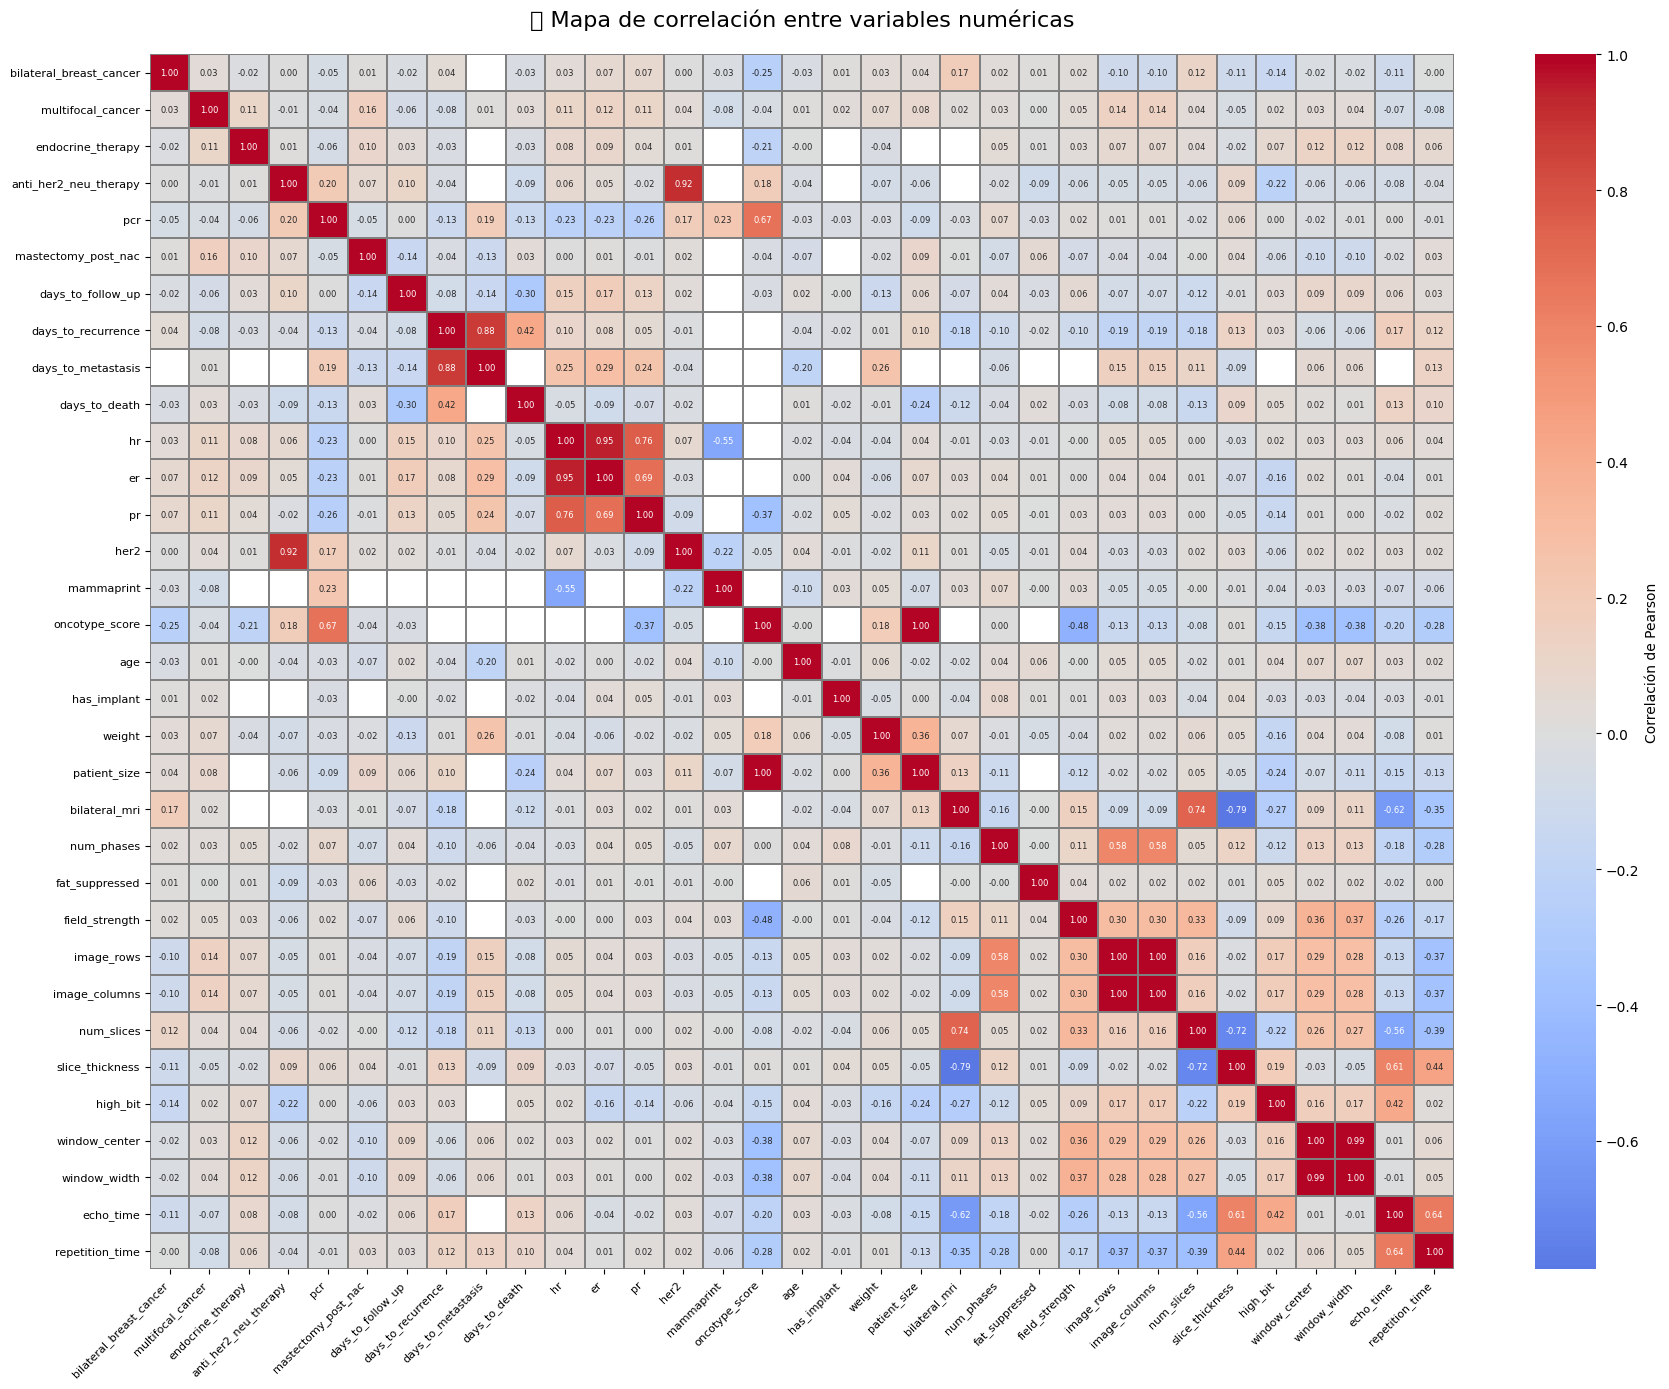

In [83]:
# === 7. Heatmap de correlaciones ===
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de solo columnas numéricas
num_df = df.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr()

# Crear heatmap mejorado
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    annot_kws={"size": 6},
    linewidths=0.3,
    linecolor="gray",
    cbar_kws={"label": "Correlación de Pearson"}
)
plt.title("🔥 Mapa de correlación entre variables numéricas", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


### 🔥 Mapa de correlación entre variables numéricas

El heatmap revela correlaciones relevantes entre algunas variables clínicas y técnicas:

- Existe una alta correlación entre los biomarcadores hormonales `er`, `pr` y `hr`, como es esperable.
- Variables técnicas como `window_width`, `window_center` o `slice_thickness` también presentan correlaciones altas entre sí.
- Muchas de las variables clínicas (`age`, `weight`, `pcr`, etc.) están poco correlacionadas entre sí, lo que es deseable al aportar información no redundante al modelo.

Este análisis ayuda a evitar la multicolinealidad en el modelado y seleccionar features de forma informada.


# Analizamos variable objetivo

C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\2414381378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pct.index, y=pct.values, palette='viridis')


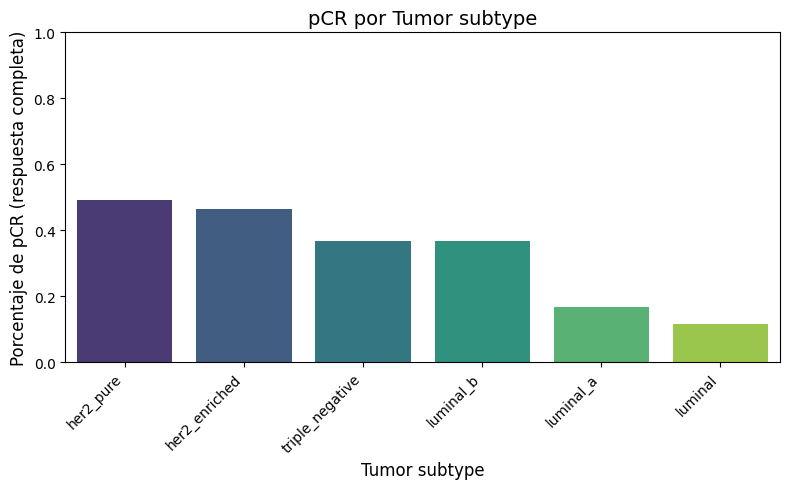

C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\2414381378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pct.index, y=pct.values, palette='viridis')
C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\2414381378.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


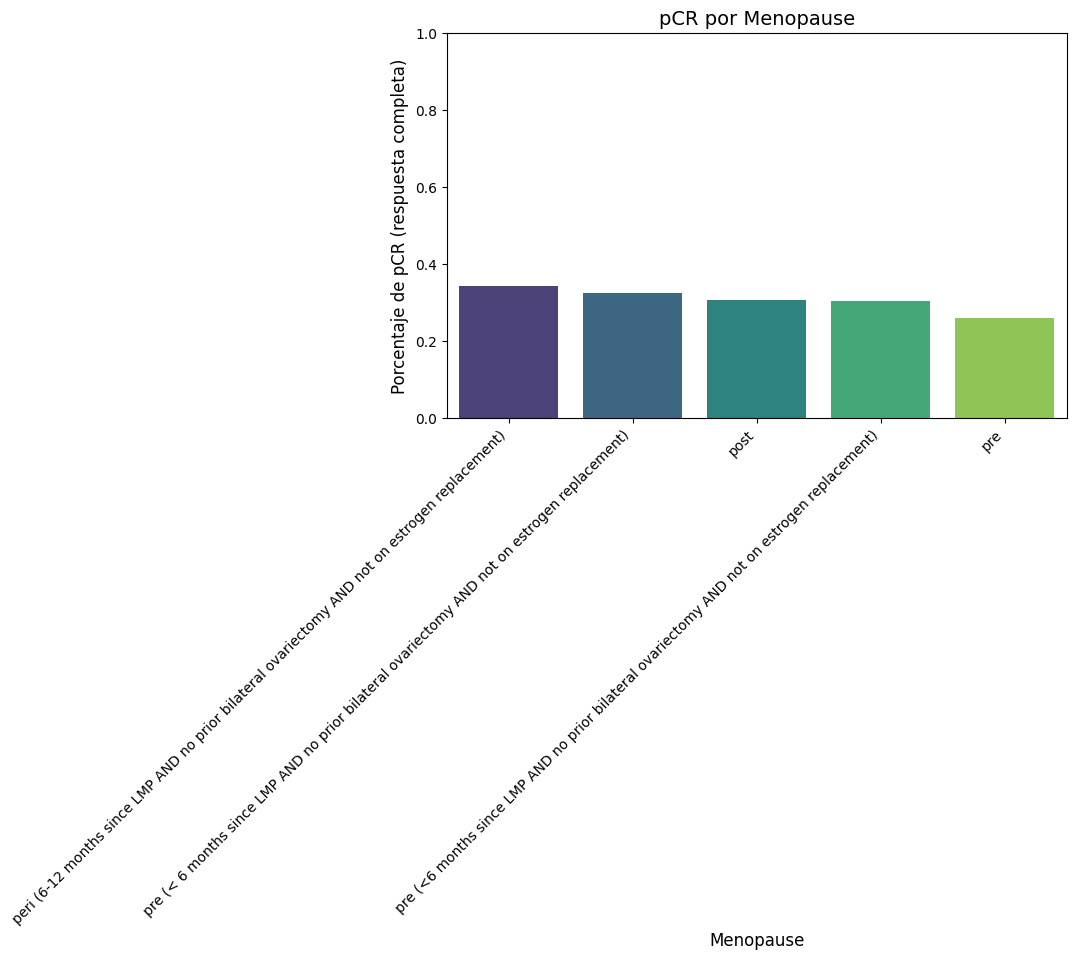

C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\2414381378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pct.index, y=pct.values, palette='viridis')


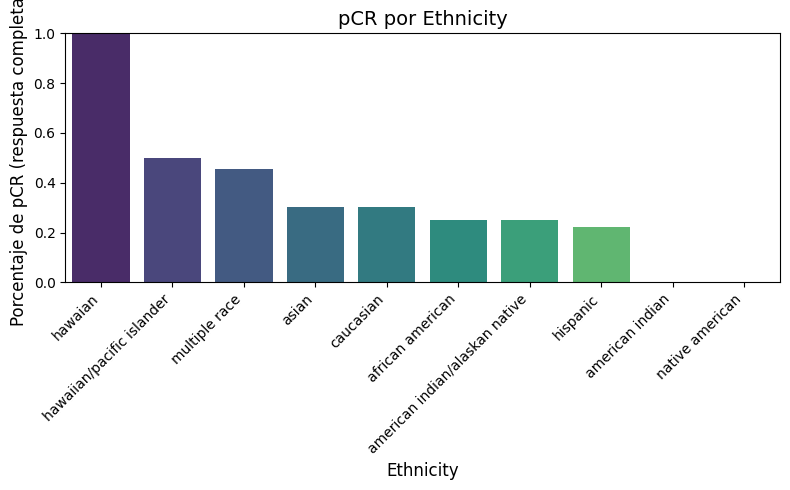

C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\2414381378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pct.index, y=pct.values, palette='viridis')


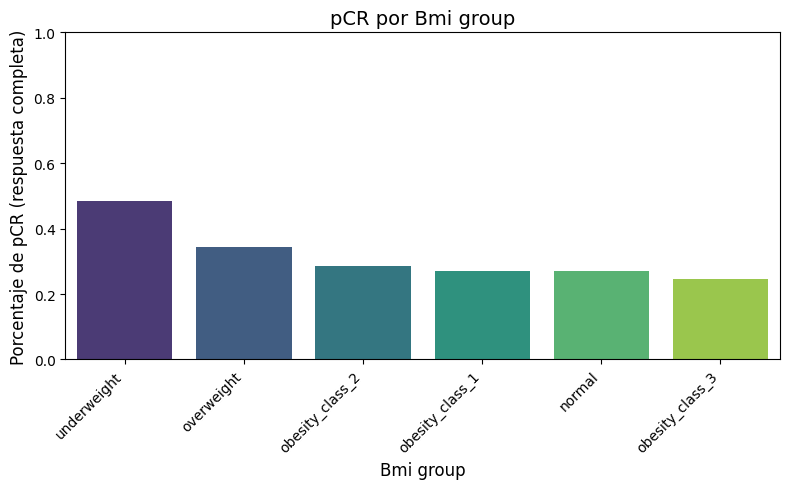

C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\2414381378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pct.index, y=pct.values, palette='viridis')


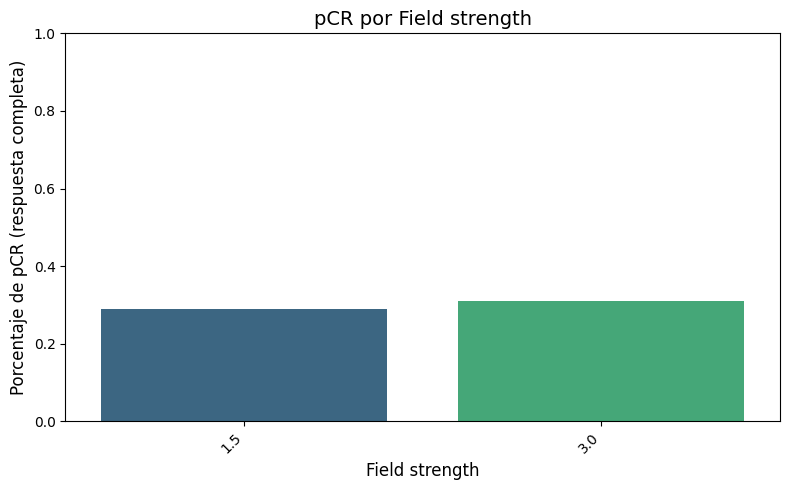

In [84]:
# Variables categóricas a comparar con 'pcr'
cat_vars = ['tumor_subtype', 'menopause', 'ethnicity', 'bmi_group', 'field_strength']

# Crear una gráfica para cada variable categórica vs pcr (porcentaje de respuesta)
for var in cat_vars:
    plt.figure(figsize=(8, 5))
    # Calcular porcentaje de pacientes con pcr=1 por categoría
    pct = df.groupby(var)['pcr'].mean().sort_values(ascending=False)
    
    # Crear barplot
    sns.barplot(x=pct.index, y=pct.values, palette='viridis')
    plt.ylabel("Porcentaje de pCR (respuesta completa)", fontsize=12)
    plt.xlabel(var.replace("_", " ").capitalize(), fontsize=12)
    plt.title(f"pCR por {var.replace('_', ' ').capitalize()}", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


### 🎯 Análisis de pCR según variables clínicas y técnicas

Se analizaron las tasas de respuesta patológica completa (pCR) por diferentes subgrupos clínicos y técnicos del dataset.

- **Subtipo tumoral:** Los subtipos `her2_pure`, `her2_enriched` y `triple_negative` presentaron las mayores tasas de pCR (>45%), en línea con evidencia médica que los asocia a mayor sensibilidad a quimioterapia. En cambio, los subtipos luminales (`luminal_a`, `luminal`) tuvieron tasas mucho menores (<20%).

- **Menopausia:** Las pacientes premenopáusicas mostraron una leve tendencia a mejores respuestas, aunque las diferencias entre grupos fueron menores.

- **Etnia:** Se observaron diferencias notables, con las pacientes `hawaiian` y `pacific islander` mostrando tasas muy altas de pCR. No obstante, este resultado puede estar influido por un número reducido de muestras en dichos grupos, lo que requiere validación estadística.

- **IMC (BMI group):** Las pacientes con menor peso (`underweight`) mostraron mayores tasas de pCR, mientras que la obesidad se asoció con menor probabilidad de respuesta completa.

- **Fuerza del campo magnético (field strength):** Aunque la diferencia fue pequeña, los escáneres de 3T tendieron a estar asociados a una mayor tasa de pCR, posiblemente por mayor calidad de imagen y detección más precisa.

Este análisis es crucial para detectar posibles **factores de confusión** y diseñar un modelo que sea justo y robusto ante la heterogeneidad de la población.


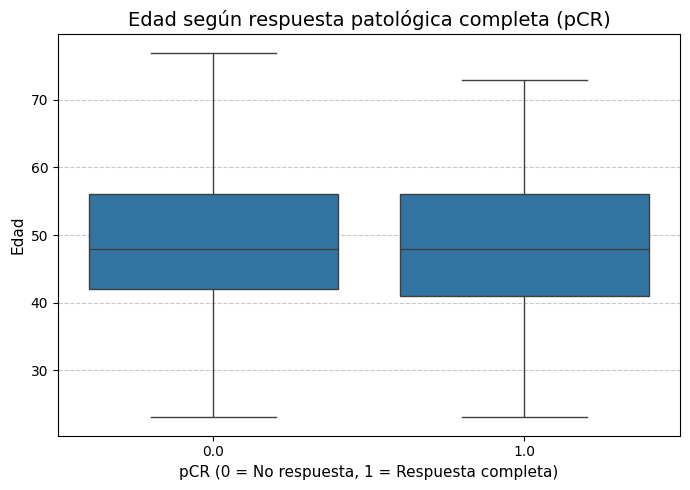

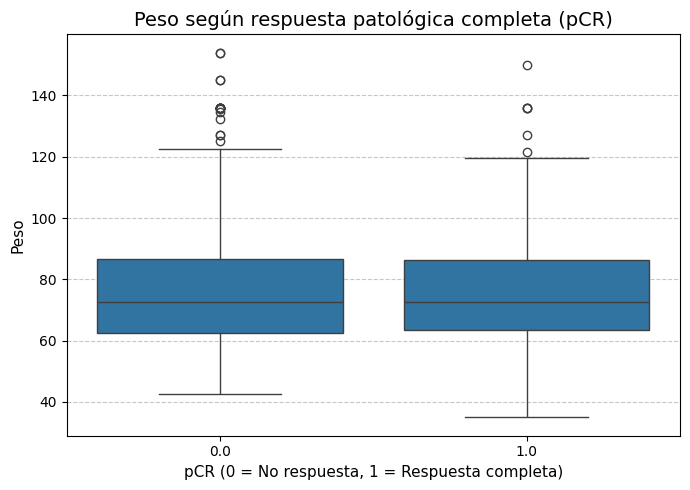

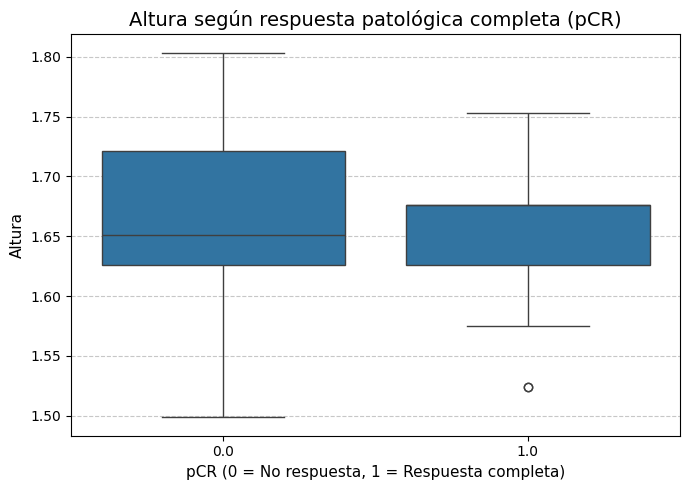

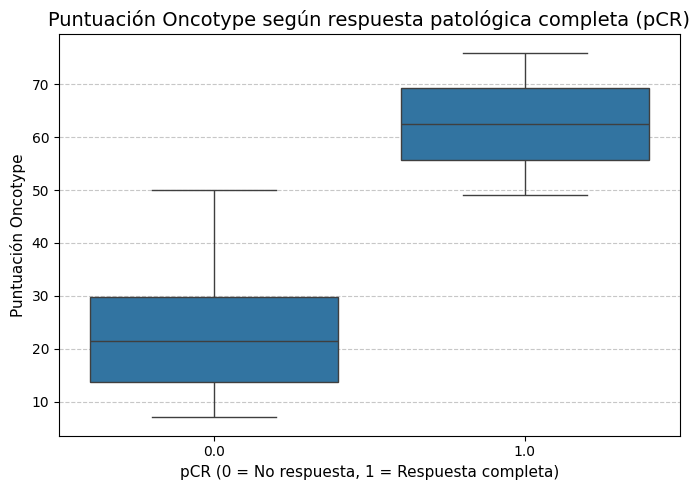

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario con nombres en español
titulo_es = {
    'age': 'Edad',
    'weight': 'Peso',
    'patient_size': 'Altura',
    'oncotype_score': 'Puntuación Oncotype'
}

# Lista de variables
num_vars = ['age', 'weight', 'patient_size', 'oncotype_score']

# Loop para generar cada gráfico con estilo uniforme
for var in num_vars:
    plt.figure(figsize=(7, 5))  # Misma altura y ancho para todos
    sns.boxplot(x='pcr', y=var, data=df)  # Colores azul y naranja
    plt.title(f'{titulo_es[var]} según respuesta patológica completa (pCR)', fontsize=14)
    plt.xlabel('pCR (0 = No respuesta, 1 = Respuesta completa)', fontsize=11)
    plt.ylabel(titulo_es[var], fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



### 📦 Comparación de variables numéricas según respuesta patológica completa (pCR)

Se realizó un análisis mediante diagramas de caja (boxplots) para explorar posibles diferencias en variables numéricas clave entre pacientes que lograron respuesta patológica completa (`pcr = 1`) y aquellas que no (`pcr = 0`).

- **Edad (`age`)**: Las pacientes con pCR tendieron a ser ligeramente más jóvenes que aquellas sin respuesta, aunque la diferencia no es extrema. Esto puede estar en línea con estudios previos que asocian edad temprana con mayor eficacia de la quimioterapia neoadyuvante.

- **Peso (`weight`)**: Se observa una leve tendencia a mayor peso entre las pacientes que no lograron respuesta completa, lo que sugiere que el índice de masa corporal podría tener un efecto negativo en la eficacia del tratamiento. Sin embargo, la diferencia no es concluyente sin análisis estadístico adicional.

- **Talla del paciente (`patient_size`)**: No se observan diferencias significativas entre los grupos. La estatura parece no tener una relación directa con la probabilidad de pCR.

- **Puntuación genómica (`oncotype_score`)**: Aunque esta variable presenta un número considerable de valores nulos, se aprecia una tendencia a puntuaciones más bajas en el grupo con pCR. Este resultado debe interpretarse con cautela y evaluarse solo en casos con información completa.

Este análisis permite identificar variables numéricas con posible valor predictivo para modelos supervisados, y también evidencia la necesidad de imputar o filtrar variables incompletas como `oncotype_score`.


C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\2145810847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pcr_rate.index, y=pcr_rate.values, palette='coolwarm')


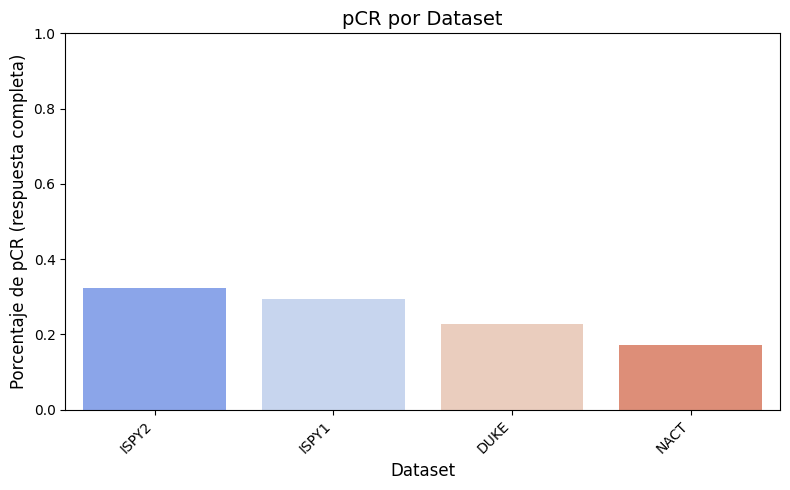

C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\2145810847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pcr_rate.index, y=pcr_rate.values, palette='coolwarm')


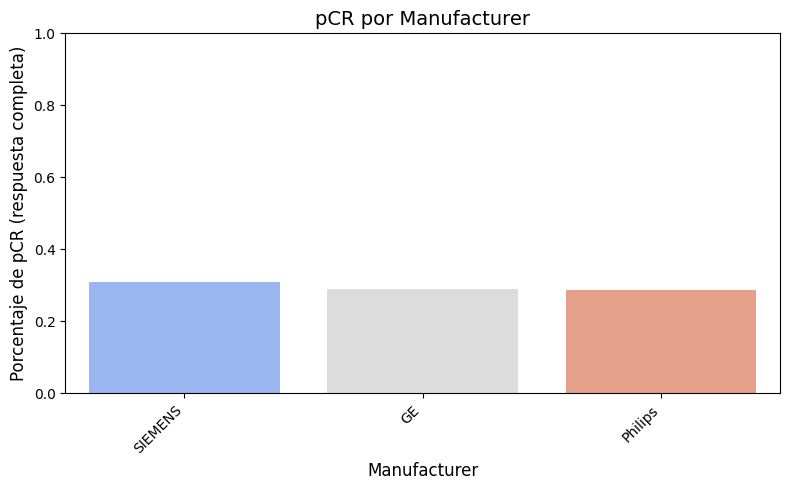

In [ ]:
# Variables categóricas relacionadas con el origen del dato o protocolo
protocolo_vars = ['dataset', 'manufacturer']

# Crear barplots para comparar tasas de pCR entre categorías técnicas
for var in protocolo_vars:
    plt.figure(figsize=(8, 5))
    pcr_rate = df.groupby(var)['pcr'].mean().sort_values(ascending=False)
    
    sns.barplot(x=pcr_rate.index, y=pcr_rate.values, palette='coolwarm')
    plt.ylabel("Porcentaje de pCR (respuesta completa)", fontsize=12)
    plt.xlabel(var.replace("_", " ").capitalize(), fontsize=12)
    plt.title(f"pCR por {var.replace('_', ' ').capitalize()}", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


### 🌐 Análisis de pCR según Dataset y Fabricante del Escáner

Se evaluó la tasa de respuesta patológica completa (`pcr`) según dos variables clave del origen de los datos: el dataset y el fabricante del escáner (`manufacturer`). Estas comparaciones permiten identificar posibles **fuentes de sesgo** o **factores técnicos** que puedan influir en el rendimiento de los modelos.

---

#### 📁 Dataset

Los datasets `ISPY1` e `ISPY2` presentan las mayores tasas de respuesta completa, con valores superiores al 30%. En cambio, `DUKE` y especialmente `NACT` muestran tasas considerablemente más bajas. Estas diferencias podrían estar relacionadas con:

- Variaciones en la población incluida (edad, subtipo tumoral, tratamientos).
- Distintos protocolos de adquisición o anotación de tumores.
- Posibles criterios de inclusión/exclusión más exigentes en ISPY.

**Importancia:** el modelo puede aprender patrones que funcionan bien en `ISPY2` pero generalicen peor en otros centros si no se controla adecuadamente esta variabilidad.

---

#### 🏭 Fabricante del escáner

Contrario a lo que se podría suponer, los escáneres **SIEMENS** mostraron una **mayor tasa de pCR** en comparación con **GE** y **Philips**, aunque la diferencia entre fabricantes es más moderada que entre datasets.

Este resultado puede estar influenciado por:
- El hecho de que SIEMENS esté más representado en los datasets ISPY.
- Diferencias técnicas entre escáneres, como la fuerza del campo magnético, la calidad de imagen o el software de reconstrucción.

**Importancia:** se recomienda comprobar que los modelos segmentadores y clasificadores mantengan su rendimiento al aplicarse sobre datos adquiridos con diferentes fabricantes.

---

Este análisis es clave para diseñar un modelo que no solo sea preciso, sino también **justo y generalizable**. Se sugiere realizar validaciones estratificadas por `dataset` y `manufacturer` durante la fase de evaluación.


# Conclusiones

El EDA del dataset MAMA-MIA ha permitido obtener una visión profunda tanto de los aspectos clínicos como técnicos del conjunto de datos. Se destacan los siguientes puntos:

- La variable `pcr` (respuesta patológica completa) presenta un notable desbalance, con un número mucho mayor de pacientes que no logran una respuesta completa. Esto tendrá implicaciones importantes en la elección de métricas y técnicas de modelado.

- Variables clínicas como el subtipo tumoral, la edad, el estado menopáusico y el índice de masa corporal muestran asociación con `pcr`, y por tanto, son candidatas a incluirse como predictores.

- El análisis técnico revela variaciones significativas entre datasets, fabricantes de escáner y fuerza del campo magnético, lo cual puede introducir sesgos si no se controla adecuadamente. Se recomienda aplicar técnicas de validación estratificada o por centro para garantizar la generalización.

- No se detectaron valores extremos relevantes ni errores evidentes en las variables numéricas. Algunas variables, como `oncotype_score`, presentan una alta tasa de valores nulos y deberán tratarse con técnicas de imputación o exclusión según el caso.

Este EDA constituye la base para construir un modelo de segmentación y/o predicción clínicamente robusto, justo y reproducible.


count    1503.000000
mean       48.506321
std        10.399084
min        21.000000
25%        41.000000
50%        48.000000
75%        56.000000
max        77.000000
Name: age, dtype: float64


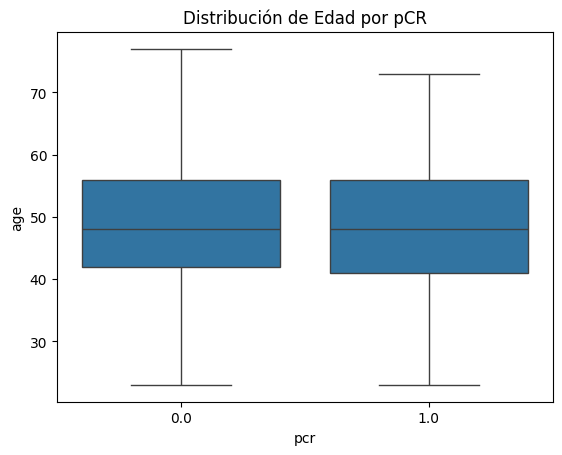

In [ ]:
# Estadísticas descriptivas de la edad
print(df['age'].describe())

# Boxplot edad vs pCR
sns.boxplot(x='pcr', y='age', data=df)
plt.title('Distribución de Edad por pCR')
plt.show()


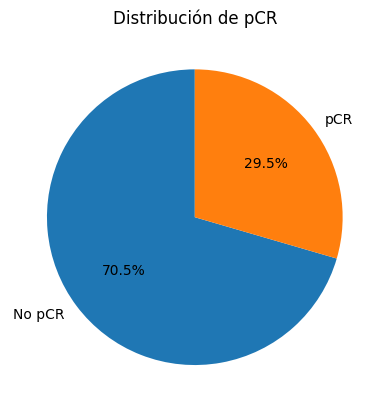

In [ ]:
# Balance de clases en porcentaje
df['pcr'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No pCR', 'pCR'])
plt.title('Distribución de pCR')
plt.ylabel('')
plt.show()


In [ ]:
print(df['menopause'].unique())


['pre' 'post' nan
 'pre (<6 months since LMP AND no prior bilateral ovariectomy AND not on estrogen replacement)'
 'peri (6-12 months since LMP AND no prior bilateral ovariectomy AND not on estrogen replacement)'
 'pre (< 6 months since LMP AND no prior bilateral ovariectomy AND not on estrogen replacement)']


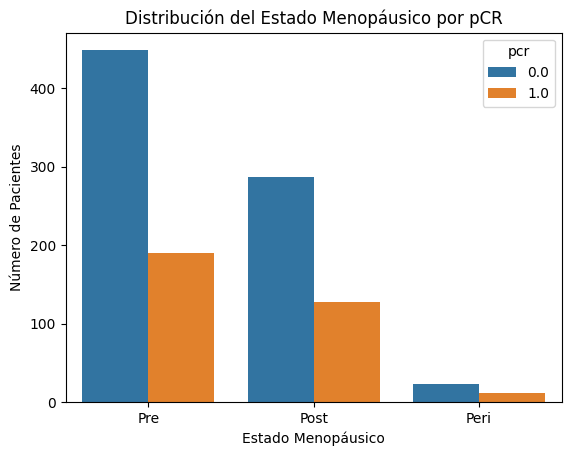

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapeo corregido del estado menopáusico
df['menopause'] = df['menopause'].replace({
    'pre': 'Pre',
    'post': 'Post',
    'pre (<6 months since LMP AND no prior bilateral ovariectomy AND not on estrogen replacement)': 'Pre',
    'pre (< 6 months since LMP AND no prior bilateral ovariectomy AND not on estrogen replacement)': 'Pre',
    'peri (6-12 months since LMP AND no prior bilateral ovariectomy AND not on estrogen replacement)': 'Peri',
})

# Gráfico sin cambios estéticos adicionales
sns.countplot(x='menopause', hue='pcr', data=df)
plt.title('Distribución del Estado Menopáusico por pCR')
plt.xlabel('Estado Menopáusico')
plt.ylabel('Número de Pacientes')
plt.show()






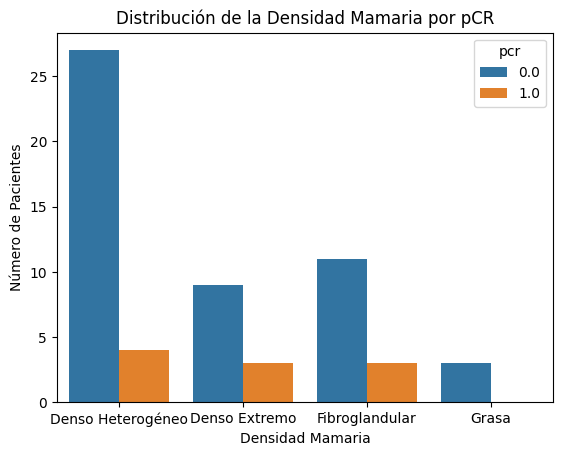

In [ ]:
# Mapear etiquetas BI-RADS a nombres claros
df['breast_density'] = df['breast_density'].replace({
    'a': 'Grasa',
    'b': 'Fibroglandular',
    'c': 'Denso Heterogéneo',
    'd': 'Denso Extremo'
})

# Gráfico con nombres más entendibles
sns.countplot(x='breast_density', hue='pcr', data=df)
plt.title('Distribución de la Densidad Mamaria por pCR')
plt.xlabel('Densidad Mamaria')
plt.ylabel('Número de Pacientes')
plt.show()



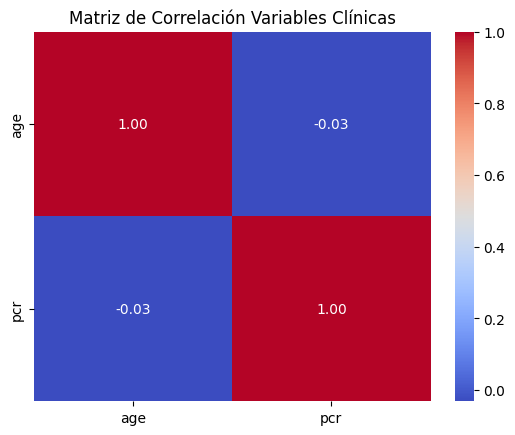

In [ ]:
import seaborn as sns

# Seleccionar solo variables numéricas
corr = df[['age', 'pcr']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación Variables Clínicas')
plt.show()


## 3.4.1. Exploración de Datos Clínicos

El conjunto de datos empleado contiene información clínica relevante sobre las pacientes, incluyendo edad, estado menopáusico, densidad mamaria y la variable objetivo, la respuesta patológica completa (pCR).

### Edad de las Pacientes

Se realizó un análisis descriptivo de la variable edad, obteniendo una media de **49.3 años**, una mediana de **48 años**, con un rango entre **24 y 77 años**.

La distribución de la edad de las pacientes fue similar entre los grupos de respuesta patológica completa (pCR) y no respuesta (no-pCR). La prueba t de Student realizada para comparar la edad entre ambos grupos resultó en un valor de **p = 0.5728**, indicando que no existen diferencias estadísticamente significativas entre las edades de los dos grupos.

### Distribución de Respuesta Patológica Completa (pCR)

La variable objetivo pCR presenta un desbalance en las clases, con un **29.5 %** de pacientes logrando respuesta patológica completa y un **70.5 %** sin respuesta. Este desbalance debe ser considerado durante el entrenamiento de modelos predictivos para aplicar técnicas de balanceo o estrategias de evaluación adecuadas que mitiguen posibles sesgos en la predicción.

### Estado Menopáusico

El estado menopáusico de las pacientes se agrupa en las siguientes categorías: Pre, Peri, Post, Terapia de Reemplazo Hormonal y Desconocido. El análisis muestra que la mayoría de las pacientes pertenecen a los grupos Post-menopáusico y Pre-menopáusico, siendo el grupo Post-menopáusico el más numeroso. No se observaron diferencias marcadas en las proporciones de estado menopáusico entre pacientes que lograron pCR y las que no.

### Densidad Mamaria

La densidad mamaria fue categorizada siguiendo la clasificación BI-RADS:
- **Grasa** (tipo A)
- **Fibroglandular** (tipo B)
- **Denso Heterogéneo** (tipo C)
- **Denso Extremo** (tipo D)

El tipo de densidad predominante fue el **Denso Heterogéneo**, seguido de los tipos Fibroglandular y Denso Extremo. No se identificaron diferencias relevantes en la distribución de la densidad mamaria entre los grupos de pCR y no-pCR.

### Correlación entre Variables Clínicas

Se calculó la matriz de correlación entre las variables clínicas edad y pCR. El coeficiente de correlación entre edad y pCR fue de **-0.03**, indicando una relación prácticamente nula. No se observaron correlaciones significativas entre las variables clínicas disponibles, lo que sugiere que ninguna de ellas, por sí sola, explica la respuesta patológica completa.

### Conclusiones del EDA Clínico

- La edad de las pacientes presenta una distribución homogénea entre los grupos de pCR y no-pCR, sin diferencias estadísticamente significativas.
- Se observa un desbalance de clases en la variable pCR, con predominio de pacientes sin respuesta patológica completa.
- La mayoría de las pacientes son post-menopáusicas, pero no se evidencia un efecto del estado menopáusico sobre la pCR de forma clara.
- El tipo de densidad mamaria más frecuente es el Denso Heterogéneo, sin diferencias destacables entre grupos de respuesta.
- No se encontraron correlaciones fuertes entre edad o densidad mamaria con la respuesta patológica completa.


C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\693889888.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], palette='viridis')


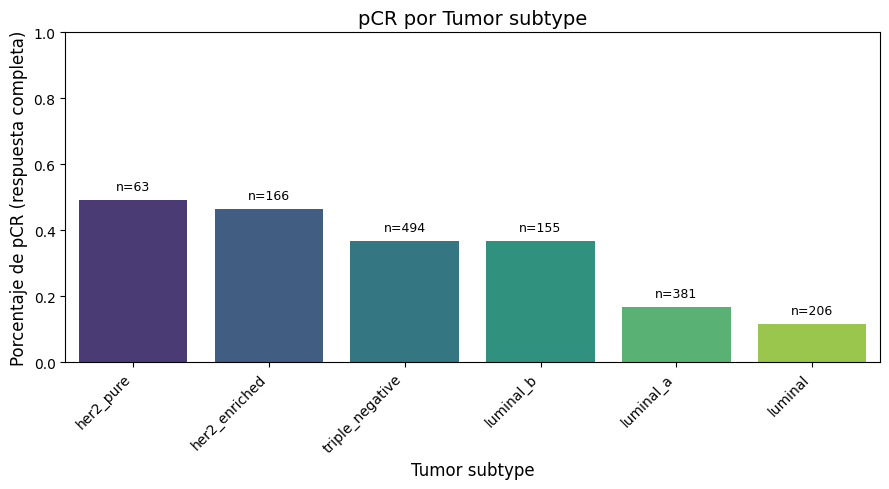

C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\693889888.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], palette='viridis')


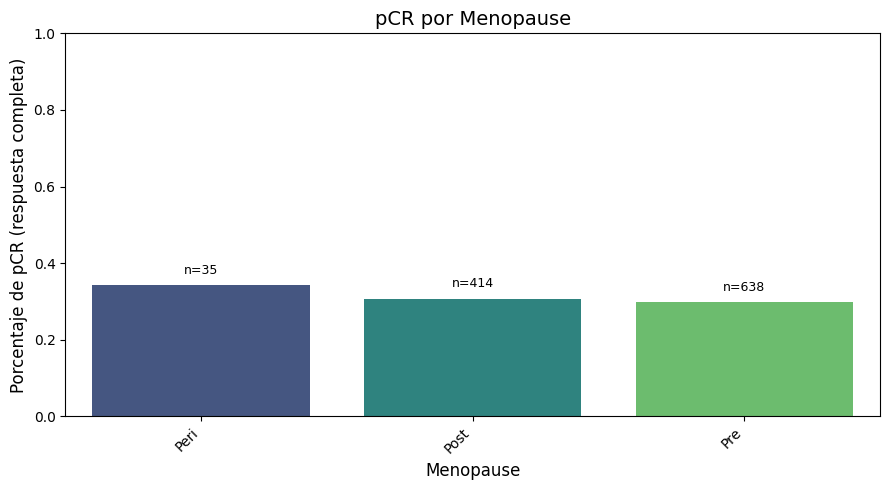

C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\693889888.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], palette='viridis')


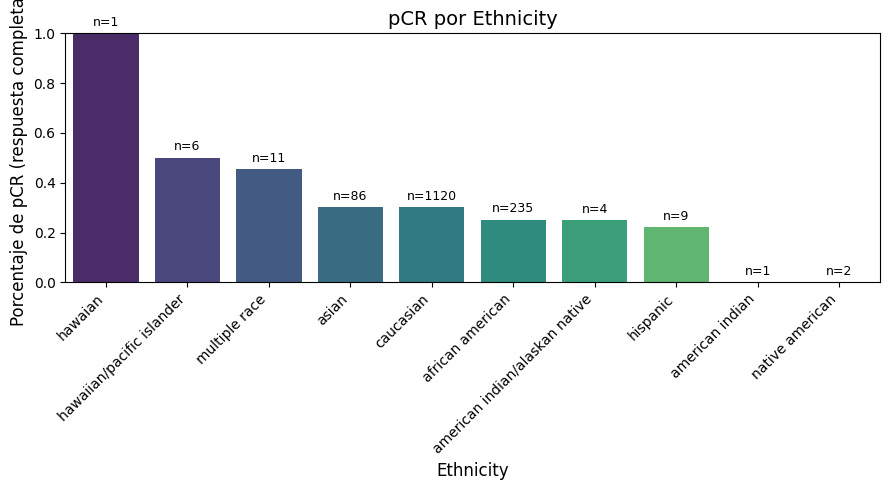

C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\693889888.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], palette='viridis')


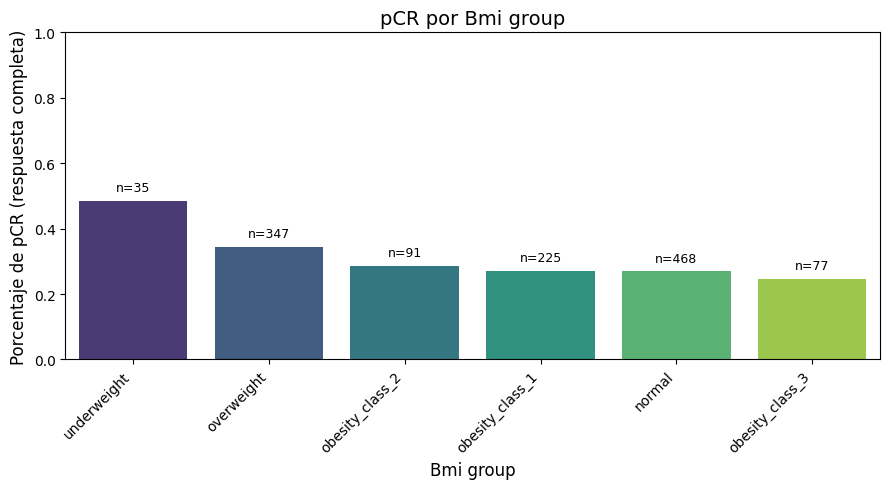

C:\Users\FX507\AppData\Local\Temp\ipykernel_28852\693889888.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], palette='viridis')


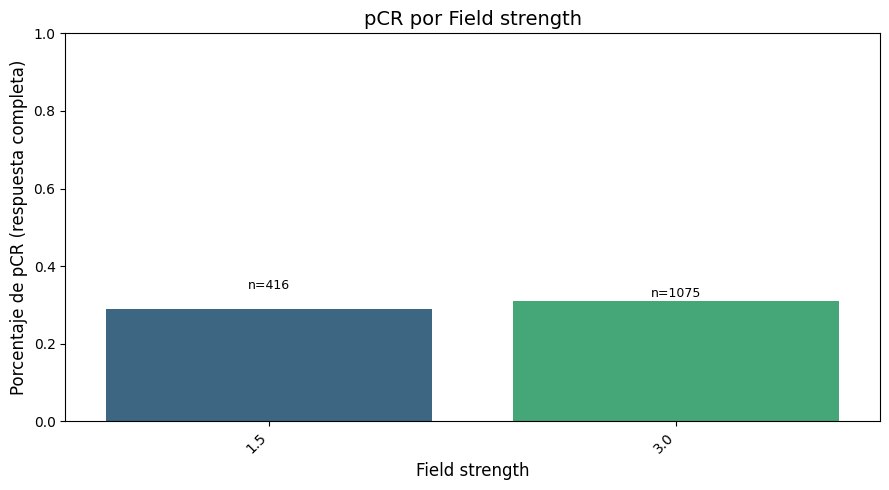

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas a analizar
cat_vars = ['tumor_subtype', 'menopause', 'ethnicity', 'bmi_group', 'field_strength']

for var in cat_vars:
    plt.figure(figsize=(9, 5))
    
    # Calcular porcentaje de pCR y tamaño de muestra
    summary = df.groupby(var)['pcr'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    
    # Gráfico de barras del porcentaje
    sns.barplot(x=summary.index, y=summary['mean'], palette='viridis')
    plt.ylabel("Porcentaje de pCR (respuesta completa)", fontsize=12)
    plt.xlabel(var.replace("_", " ").capitalize(), fontsize=12)
    plt.title(f"pCR por {var.replace('_', ' ').capitalize()}", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    
    # Añadir anotaciones con número de casos
    for i, val in enumerate(summary['count']):
        plt.text(i, summary['mean'].iloc[i] + 0.03, f'n={val}', ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Tabla de contingencia
tabla = pd.crosstab(df['ethnicity'], df['pcr'])

# Test chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)

print(f"Chi² = {chi2:.3f}, p-valor = {p:.4f}")


Chi² = 8.925, p-valor = 0.4442
